## 0. Import libraries

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

## 1. import data

In [2]:
tripdata_2019_jan = pd.read_csv('data/yellow_tripdata_2019-01.csv')
tripdata = pd.concat([tripdata_2019_jan])

In [3]:
tripdata.shape

(7667792, 18)

In [6]:
tripdata.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
5323416,2,2019-01-23 08:31:05,2019-01-23 08:41:28,1,1.74,1,N,142,236,2,9.0,0.0,0.5,0.0,0.0,0.3,9.8,0.0
3575596,2,2019-01-15 23:05:47,2019-01-15 23:26:05,1,4.15,1,N,113,43,2,15.0,0.5,0.5,0.0,0.0,0.3,16.3,NaN
1945086,2,2019-01-09 19:28:55,2019-01-09 20:00:20,1,5.00,1,N,142,79,1,22.0,1.0,0.5,5.0,0.0,0.3,28.8,NaN
6726584,2,2019-01-28 14:52:37,2019-01-28 15:10:45,1,2.10,1,N,68,100,2,12.5,0.0,0.5,0.0,0.0,0.3,13.3,0.0
226503,2,2019-01-02 09:21:28,2019-01-02 09:26:38,1,0.74,1,N,239,143,2,5.0,0.0,0.5,0.0,0.0,0.3,5.8,NaN


## 2. Data Exploration

In [7]:
tripdata.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [8]:
tripdata = tripdata[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID','PULocationID', 'DOLocationID',
       'payment_type','total_amount']]

In [9]:
tripdata.head(5)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


array([[<Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>],
       [<Axes: title={'center': 'PULocationID'}>,
        <Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>],
       [<Axes: title={'center': 'total_amount'}>, <Axes: >, <Axes: >]],
      dtype=object)

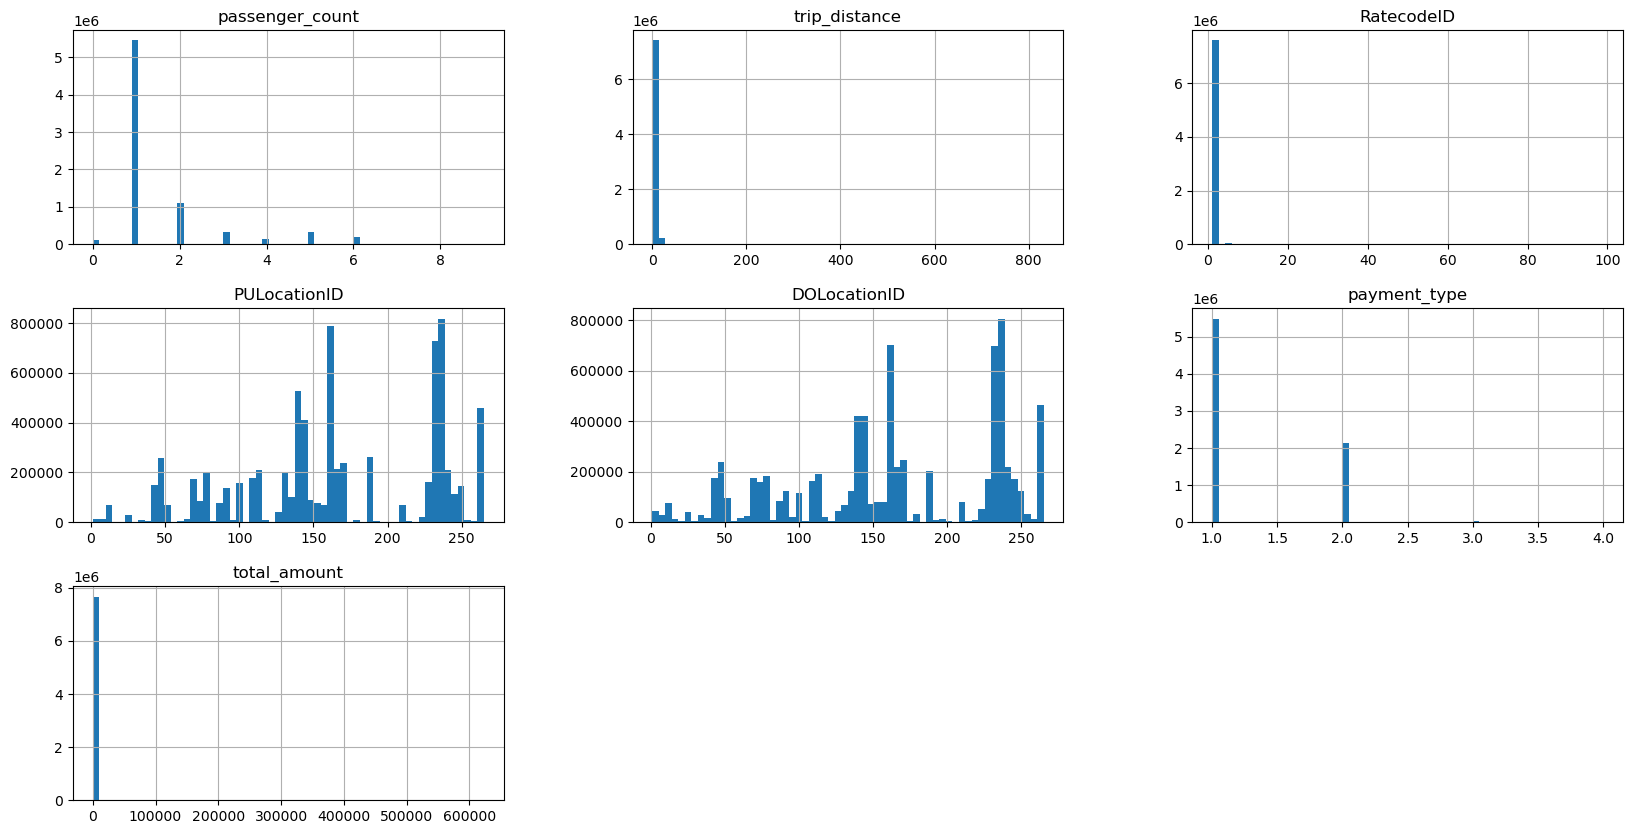

In [10]:
tripdata.hist(figsize=(20,10), bins=60)

In [11]:
tripdata['RatecodeID'].value_counts()

RatecodeID
1     7430139
2      166090
5       54569
3       11801
4        4895
99        252
6          46
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

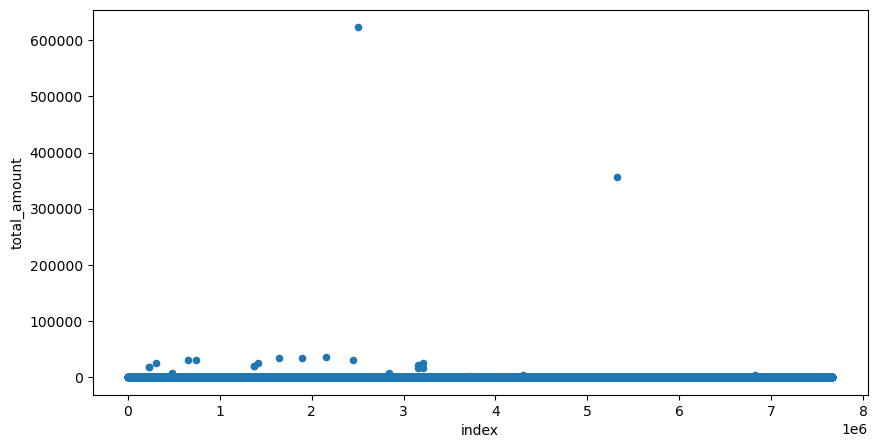

In [12]:
tripdata.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

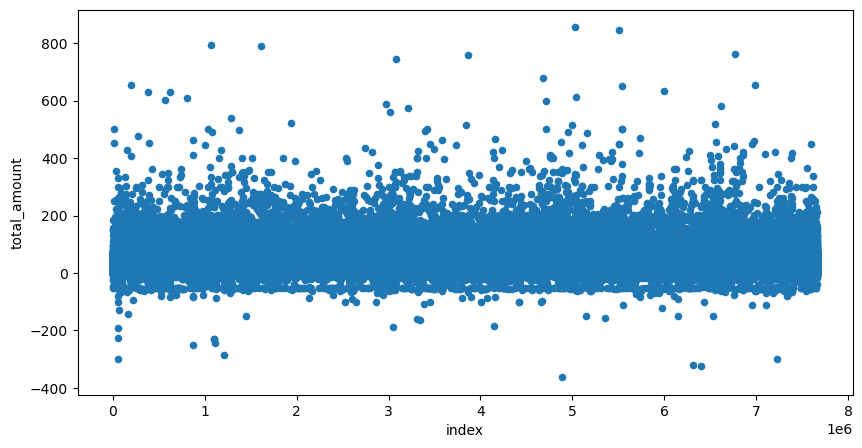

In [14]:
tripdata[tripdata['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))